In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import numpy as np
import pandas_profiling
import math

In [2]:
hurdat = pd.read_csv(r"C:/Users/jacks/Documents/Springboard/hurricanes_capstone/HURDAT2 Data.csv")

In [3]:
hurdat.head()

Name      Date  Time Status     Lat     Long  Maximum sustained wind  \
0   Alex       NaN   NaN    NaN     NaN      NaN                     NaN   
1  FALSE  20040731  1800     TD   30.3N    78.3W                    25.0   
2  FALSE  20040801     0     TD   31.0N    78.8W                    25.0   
3  FALSE  20040801   600     TD   31.5N    79.0W                    25.0   
4  FALSE  20040801  1200     TD   31.6N    79.1W                    30.0   

   Minimum Pressure  34 kt radii NE  34 kt radii SE  ...  50 kt radii SW  \
0               NaN             NaN             NaN  ...             NaN   
1            1010.0             0.0             0.0  ...             0.0   
2            1009.0             0.0             0.0  ...             0.0   
3            1009.0             0.0             0.0  ...             0.0   
4            1009.0             0.0             0.0  ...             0.0   

   50 kt radii NW  64 kt radii NE  64 kt radii SE  64 kt radii SW  \
0             NaN             NaN             NaN             NaN   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   64 kt radii NW  87 kt radii NE (est)  87 kt radii SE (est)  \
0             NaN                   NaN                   NaN   
1             0.0                   0.0                   0.0   
2             0.0                   0.0                   0.0   
3             0.0                   0.0                   0.0   
4             0.0                   0.0                   0.0   

   87 kt radii SW (est)  87 kt radii NW (est)  
0                   NaN                   NaN  
1                   0.0                   0.0  
2                   0.0                   0.0  
3                   0.0                   0.0  
4                   0.0                   0.0  

[5 rows x 24 columns]

In [4]:
hurdat.shape

(8566, 24)

In [5]:
hurdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566 entries, 0 to 8565
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8566 non-null   object 
 1   Date                    8565 non-null   object 
 2   Time                    8565 non-null   object 
 3   Status                  8298 non-null   object 
 4   Lat                     8298 non-null   object 
 5   Long                    8298 non-null   object 
 6   Maximum sustained wind  8298 non-null   float64
 7   Minimum Pressure        8298 non-null   float64
 8   34 kt radii NE          8298 non-null   float64
 9   34 kt radii SE          8298 non-null   float64
 10  34 kt radii SW          8298 non-null   float64
 11  34 kt radii NW          8298 non-null   float64
 12  50 kt radii NE          8298 non-null   float64
 13  50 kt radii SE          8298 non-null   float64
 14  50 kt radii SW          8298 non-null   

In [6]:
# fix date column

hurdat['Date'] = pd.to_datetime(hurdat['Date'],errors='coerce',yearfirst=False)

In [7]:
# fix the name column

# create a list of values in Name column without white space

name_col = list(hurdat['Name'].str.lstrip())

In [8]:
# create a list of names called 'new_names'
# make each 'FALSE' the preceeding name until the next name

new_names = []
name = ''

for x in name_col:
    if x != 'FALSE':
        new_names.append(x)
        name = x
    else:
        new_names.append(name)

In [9]:
# add Storm Names column

hurdat['Storm_Name'] = new_names

# remove the Name column

hurdat.drop('Name',axis=1,inplace=True)

In [10]:
# remove rows with excessive NaN values

hurdat.dropna(axis=0,thresh=10,inplace=True)

# set Storm_Name as index

hurdat = hurdat.set_index(['Storm_Name'])

In [11]:
# change column names to names easier to work with

hurdat.columns = ['Date', 'Time', 'Status', 'Lat', 'Long', 'Max_Wind',
       'Min_Pressure', 'ne_34_kt', 'se_34_kt',
       'sw_34_kt', 'nw_34_kt', 'ne_50_kt', 'se_50_kt',
       'sw_50_kt', 'nw_50_kt', 'ne_64_kt', 'se_64_kt',
       'sw_64_kt', 'nw_64_kt', 'ne_87_kt', 'se_87_kt',
       'sw_87_kt', 'nw_87_kt']

In [12]:
hurdat.head()

Date  Time Status     Lat     Long  Max_Wind  Min_Pressure  \
Storm_Name                                                                    
Alex       2004-07-31  1800     TD   30.3N    78.3W      25.0        1010.0   
Alex       2004-08-01     0     TD   31.0N    78.8W      25.0        1009.0   
Alex       2004-08-01   600     TD   31.5N    79.0W      25.0        1009.0   
Alex       2004-08-01  1200     TD   31.6N    79.1W      30.0        1009.0   
Alex       2004-08-01  1800     TS   31.6N    79.2W      35.0        1009.0   

            ne_34_kt  se_34_kt  sw_34_kt  ...  sw_50_kt  nw_50_kt  ne_64_kt  \
Storm_Name                                ...                                 
Alex             0.0       0.0       0.0  ...       0.0       0.0       0.0   
Alex             0.0       0.0       0.0  ...       0.0       0.0       0.0   
Alex             0.0       0.0       0.0  ...       0.0       0.0       0.0   
Alex             0.0       0.0       0.0  ...       0.0       0.0       0.0   
Alex             0.0      50.0      50.0  ...       0.0       0.0       0.0   

            se_64_kt  sw_64_kt  nw_64_kt  ne_87_kt  se_87_kt  sw_87_kt  \
Storm_Name                                                               
Alex             0.0       0.0       0.0       0.0       0.0       0.0   
Alex             0.0       0.0       0.0       0.0       0.0       0.0   
Alex             0.0       0.0       0.0       0.0       0.0       0.0   
Alex             0.0       0.0       0.0       0.0       0.0       0.0   
Alex             0.0       0.0       0.0       0.0       0.0       0.0   

            nw_87_kt  
Storm_Name            
Alex             0.0  
Alex             0.0  
Alex             0.0  
Alex             0.0  
Alex             0.0  

[5 rows x 23 columns]

In [13]:
# generate the descriptive statistics of the dataframe

hurdat.describe()

Max_Wind  Min_Pressure     ne_34_kt     se_34_kt     sw_34_kt  \
count  8298.000000   8298.000000  8298.000000  8298.000000  8298.000000   
mean     49.581224    993.034225    72.765727    67.248132    40.861051   
std      25.695038     19.625659   138.149719   137.181624   128.551513   
min      10.000000    882.000000  -999.000000  -999.000000  -999.000000   
25%      30.000000    986.000000     0.000000     0.000000     0.000000   
50%      45.000000   1000.000000    60.000000    60.000000     0.000000   
75%      60.000000   1007.000000   130.000000   120.000000    80.000000   
max     160.000000   1021.000000   780.000000   600.000000   660.000000   

          nw_34_kt     ne_50_kt     se_50_kt     sw_50_kt     nw_50_kt  \
count  8298.000000  8298.000000  8298.000000  8298.000000  8298.000000   
mean     51.528682    15.143408    13.955772     6.670885     9.669197   
std     130.479994   108.297557   108.385690   104.952188   106.190626   
min    -999.000000  -999.000000  -999.000000  -999.000000  -999.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%      40.000000     0.000000     0.000000     0.000000     0.000000   
75%     100.000000    40.000000    40.000000    20.000000    30.000000   
max     600.000000   360.000000   300.000000   330.000000   390.000000   

          ne_64_kt     se_64_kt     sw_64_kt     nw_64_kt     ne_87_kt  \
count  8298.000000  8298.000000  8298.000000  8298.000000  8298.000000   
mean     -1.558809    -1.951675    -4.135334    -3.161605     0.004179   
std     100.251547   100.259635    99.289571    99.761684    36.777926   
min    -999.000000  -999.000000  -999.000000  -999.000000  -570.142000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     180.000000   250.000000   180.000000   300.000000    60.498700   

          se_87_kt     sw_87_kt     nw_87_kt  
count  8298.000000  8298.000000  8298.000000  
mean     -0.350238    -0.806700    -0.342362  
std      36.538911    36.230047    36.517735  
min    -570.142000  -570.142000  -570.142000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max      53.488700    43.053700    53.488700

## Takeaways from the descriptive statistics

1. The counts are all equal. This is good.
2. Some of the mean values are negative for the radii. This means there are negative values which is impossible
3. Standard deviations look to be ok for now
4. As suspected from the mean values there are many negative values for the wind radii
5. The IQRs look to be ok for now
6. Maximums look to be ok for now

In [25]:
cols = list(hurdat)
print(list(enumerate(cols)))

[(0, 'Date'), (1, 'Time'), (2, 'Status'), (3, 'Lat'), (4, 'Long'), (5, 'Max_Wind'), (6, 'Min_Pressure'), (7, 'ne_34_kt'), (8, 'se_34_kt'), (9, 'sw_34_kt'), (10, 'nw_34_kt'), (11, 'ne_50_kt'), (12, 'se_50_kt'), (13, 'sw_50_kt'), (14, 'nw_50_kt'), (15, 'ne_64_kt'), (16, 'se_64_kt'), (17, 'sw_64_kt'), (18, 'nw_64_kt'), (19, 'ne_87_kt'), (20, 'se_87_kt'), (21, 'sw_87_kt'), (22, 'nw_87_kt')]


In [26]:
# remove negative values from the radii

hurdat['ne_34_kt'].clip(lower=0, inplace=True)
hurdat['se_34_kt'].clip(lower=0, inplace=True)
hurdat['sw_34_kt'].clip(lower=0, inplace=True)
hurdat['nw_34_kt'].clip(lower=0, inplace=True)
hurdat['ne_50_kt'].clip(lower=0, inplace=True)
hurdat['se_50_kt'].clip(lower=0, inplace=True)
hurdat['sw_50_kt'].clip(lower=0, inplace=True)
hurdat['nw_50_kt'].clip(lower=0, inplace=True)
hurdat['ne_64_kt'].clip(lower=0, inplace=True)
hurdat['se_64_kt'].clip(lower=0, inplace=True)
hurdat['sw_64_kt'].clip(lower=0, inplace=True)
hurdat['nw_64_kt'].clip(lower=0, inplace=True)
hurdat['ne_87_kt'].clip(lower=0, inplace=True)
hurdat['se_87_kt'].clip(lower=0, inplace=True)
hurdat['sw_87_kt'].clip(lower=0, inplace=True)
hurdat['nw_87_kt'].clip(lower=0, inplace=True)

In [31]:
# caluculate effective radius for each wind threshold
# eff_rad_* function calculates the Effective Radius for the 4 wind thresholds
# the value output is in nautical miles

def eff_rad_34(x):
    if x['Max_Wind']>=34:
        num = (0.5*(math.sqrt((x['ne_34_kt']**2) + (x['se_34_kt']**2) + (x['sw_34_kt']**2) + (x['nw_34_kt']**2))))
        return round(num,2)

def eff_rad_50(x):
    if x['Max_Wind']>=50:
        num = (0.5*(math.sqrt((x['ne_50_kt']**2) + (x['se_50_kt']**2) + (x['sw_50_kt']**2) + (x['nw_50_kt']**2))))
        return round(num,2)

def eff_rad_64(x):
    if x['Max_Wind']>=64:
        num = (0.5*(math.sqrt((x['ne_64_kt']**2) + (x['se_64_kt']**2) + (x['sw_64_kt']**2) + (x['nw_64_kt']**2))))
        return round(num,2)
    
def eff_rad_87(x):
    if x['Max_Wind']>=87:
        num = (0.5*(math.sqrt((x['ne_87_kt']**2) + (x['se_87_kt']**2) + (x['sw_87_kt']**2) + (x['nw_87_kt']**2))))
        return round(num,2)

In [32]:
# use .apply function to create new columns

hurdat['eff_rad_34']=hurdat.apply(eff_rad_34, axis=1)
hurdat['eff_rad_50']=hurdat.apply(eff_rad_50, axis=1)
hurdat['eff_rad_64']=hurdat.apply(eff_rad_64, axis=1)
hurdat['eff_rad_87']=hurdat.apply(eff_rad_87, axis=1)

In [33]:
# change NaN values in eff_rad_* columns to 0.0

hurdat['eff_rad_34']=hurdat['eff_rad_34'].fillna(0.0)
hurdat['eff_rad_50']=hurdat['eff_rad_50'].fillna(0.0)
hurdat['eff_rad_64']=hurdat['eff_rad_64'].fillna(0.0)
hurdat['eff_rad_87']=hurdat['eff_rad_87'].fillna(0.0)

In [35]:
hurdat.describe()

Max_Wind  Min_Pressure     ne_34_kt     se_34_kt     sw_34_kt  \
count  8298.000000   8298.000000  8298.000000  8298.000000  8298.000000   
mean     49.581224    993.034225    82.396963    76.879369    50.492287   
std      25.695038     19.625659    89.263606    88.361415    77.606540   
min      10.000000    882.000000     0.000000     0.000000     0.000000   
25%      30.000000    986.000000     0.000000     0.000000     0.000000   
50%      45.000000   1000.000000    60.000000    60.000000     0.000000   
75%      60.000000   1007.000000   130.000000   120.000000    80.000000   
max     160.000000   1021.000000   780.000000   600.000000   660.000000   

          nw_34_kt     ne_50_kt     se_50_kt     sw_50_kt     nw_50_kt  ...  \
count  8298.000000  8298.000000  8298.000000  8298.000000  8298.000000  ...   
mean     61.159918    24.774644    23.587009    16.302121    19.300434  ...   
std      79.478315    41.486014    41.988878    34.218589    37.076099  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%      40.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     100.000000    40.000000    40.000000    20.000000    30.000000  ...   
max     600.000000   360.000000   300.000000   330.000000   390.000000  ...   

          sw_64_kt     nw_64_kt     ne_87_kt     se_87_kt     sw_87_kt  \
count  8298.000000  8298.000000  8298.000000  8298.000000  8298.000000   
mean      5.495903     6.469631     2.263442     1.910533     1.454653   
std      14.918057    17.255857     7.989844     6.921467     5.243290   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     180.000000   300.000000    60.498700    53.488700    43.053700   

          nw_87_kt   eff_rad_34   eff_rad_50   eff_rad_64   eff_rad_87  
count  8298.000000  8298.000000  8298.000000  8298.000000  8298.000000  
mean      1.917772    74.842648    23.339816     7.647395     1.935071  
std       6.806421    78.579464    37.613525    17.474983     6.803576  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000    58.580000     0.000000     0.000000     0.000000  
75%       0.000000   113.340000    39.230000     0.000000     0.000000  
max      53.488700   639.220000   246.020000   154.030000    48.870000  

[8 rows x 22 columns]

## Find any correlation between columns

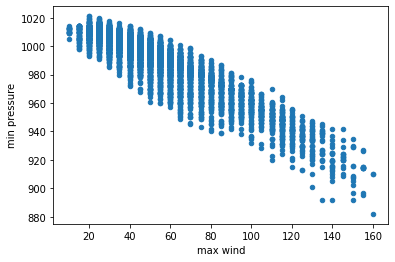

In [36]:
hurdat.plot(x='Max_Wind',y='Min_Pressure',kind='scatter')
plt.xlabel('max wind')
plt.ylabel('min pressure')
plt.show()

Strong correlation between the maximum wind speed and minimum barometric pressure

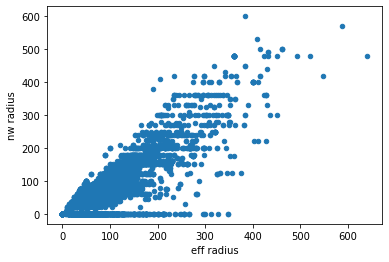

In [37]:
hurdat.plot(x='eff_rad_34',y='nw_34_kt',kind='scatter')
plt.xlabel('eff radius')
plt.ylabel('nw radius')
plt.show()

Looking at the results from the scatterplot we see there is an erroneous value

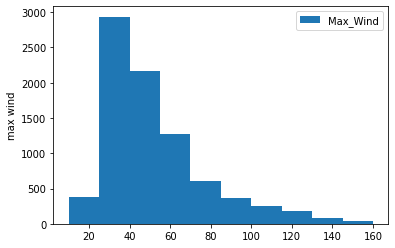

In [39]:
hurdat.plot(y='Max_Wind',kind='hist')
plt.ylabel('max wind')
plt.show()

In [34]:
hurdat

Date  Time Status     Lat     Long  Max_Wind  Min_Pressure  \
Storm_Name                                                                    
Alex       2004-07-31  1800     TD   30.3N    78.3W      25.0        1010.0   
Alex       2004-08-01     0     TD   31.0N    78.8W      25.0        1009.0   
Alex       2004-08-01   600     TD   31.5N    79.0W      25.0        1009.0   
Alex       2004-08-01  1200     TD   31.6N    79.1W      30.0        1009.0   
Alex       2004-08-01  1800     TS   31.6N    79.2W      35.0        1009.0   
Alex       2004-08-02     0     TS   31.5N    79.3W      35.0        1007.0   
Alex       2004-08-02   600     TS   31.4N    79.4W      40.0        1005.0   
Alex       2004-08-02  1200     TS   31.3N    79.0W      50.0         992.0   
Alex       2004-08-02  1800     TS   31.8N    78.7W      50.0         993.0   
Alex       2004-08-03     0     TS   32.4N    78.2W      60.0         987.0   
Alex       2004-08-03   600     HU   33.0N    77.4W      70.0         983.0   
Alex       2004-08-03  1200     HU   34.2N    76.4W      85.0         974.0   
Alex       2004-08-03  1800     HU   35.3N    75.2W      85.0         972.0   
Alex       2004-08-04     0     HU   36.0N    73.7W      80.0         974.0   
Alex       2004-08-04   600     HU   36.8N    72.1W      80.0         973.0   
Alex       2004-08-04  1200     HU   37.3N    70.2W      85.0         973.0   
Alex       2004-08-04  1800     HU   37.8N    68.3W      95.0         965.0   
Alex       2004-08-05     0     HU   38.5N    66.0W     105.0         957.0   
Alex       2004-08-05   600     HU   39.5N    63.1W     105.0         957.0   
Alex       2004-08-05  1200     HU   40.8N    59.6W     100.0         962.0   
Alex       2004-08-05  1800     HU   42.7N    55.0W      90.0         970.0   
Alex       2004-08-06     0     HU   44.5N    49.3W      75.0         978.0   
Alex       2004-08-06   600     HU   46.1N    44.2W      65.0         984.0   
Alex       2004-08-06  1200     TS   47.0N    37.5W      50.0         987.0   
Alex       2004-08-06  1800     EX   47.4N    32.7W      30.0         992.0   
BONNIE     2004-08-03  1200     TD   12.9N    53.6W      25.0        1010.0   
BONNIE     2004-08-03  1800     TD   13.2N    55.4W      25.0        1010.0   
BONNIE     2004-08-04     0     TD   13.5N    57.4W      30.0        1010.0   
BONNIE     2004-08-04   600     TD   13.6N    59.5W      30.0        1010.0   
BONNIE     2004-08-04  1200     TD   13.6N    61.6W      30.0        1010.0   
BONNIE     2004-08-04  1800     WV   13.7N    63.7W      30.0        1010.0   
BONNIE     2004-08-05     0     WV   14.0N    65.7W      25.0        1010.0   
BONNIE     2004-08-05   600     WV   14.9N    67.7W      25.0        1010.0   
BONNIE     2004-08-05  1200     WV   16.0N    69.7W      25.0        1011.0   
BONNIE     2004-08-05  1800     WV   16.5N    71.5W      25.0        1011.0   
BONNIE     2004-08-06     0     WV   17.0N    73.0W      25.0        1011.0   
BONNIE     2004-08-06   600     WV   17.1N    74.6W      25.0        1011.0   
BONNIE     2004-08-06  1200     WV   17.2N    76.2W      25.0        1011.0   
BONNIE     2004-08-06  1800     WV   17.0N    77.2W      25.0        1011.0   
BONNIE     2004-08-07     0     WV   17.1N    78.2W      25.0        1011.0   
BONNIE     2004-08-07   600     WV   17.4N    79.2W      20.0        1013.0   
BONNIE     2004-08-07  1200     WV   17.8N    80.2W      20.0        1013.0   
BONNIE     2004-08-07  1800     WV   18.4N    81.1W      20.0        1013.0   
BONNIE     2004-08-08     0     WV   19.0N    81.9W      20.0        1012.0   
BONNIE     2004-08-08   600     WV   19.7N    82.7W      25.0        1010.0   
BONNIE     2004-08-08  1200     TD   20.3N    83.5W      25.0        1009.0   
BONNIE     2004-08-08  1800     TD   20.9N    84.3W      25.0        1008.0   
BONNIE     2004-08-09     0     TD   21.5N    85.5W      25.0        1008.0   
BONNIE     2004-08-09   600     TD   22.0N    86.6W      30.0      

In [28]:
# pd.set_option('display.max_rows',None)

In [ ]:
# pandas_profiling.ProfileReport(hurdat)